# Huddersfield Away Post-Match Report

- Round 2 of the League one season saw Reading play Lincoln at home.
- Match ended in a 2-0 victory for Huddersfield

# Analysis included in this Post-Match Report

- Top Stats Comparison
- Attacking Stats Comparion
- Passing/Possession Stats Comparison
- Defensive Stats Comparison
- Goalkeeper Comparison

# Loading Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../data/rfc_matchdata.csv')

# Filtering for Huddersfield at Home
df_huddersfield_home = df[(df["Opponent"] == "Huddersfield") & (df["Venue"] == "H")].reset_index(drop=True)

match = df_huddersfield_home.iloc[0]


- "rfc" = Reading FC based stat
- "opp" = Opponent based stat

In [29]:
for col in df.columns:
    print(col)


Opponent
Round
rfc_Score
opp_Score
Result
Venue
rfc_xG_1st
rfc_xG_2nd
rfc_xG
rfc_Possession_1st
rfc_Possession_2nd
rfc_Possesion
rfc_Shots_1st
rfc_Shots_2nd
rfc_Shots
rfc_SOT_1st
rfc_SOT_2nd
rfc_SOT
rfc_BigChances_1st
rfc_BigChances_2nd
rfc_BigChances
rfc_Corners_1st
rfc_Corners_2nd
rfc_Corners
rfc_Passes_1st
rfc_Passes_2nd
rfc_Passes
rfc_Pass%_1st
rfc_Pass%_2nd
rfc_Pass%
rfc_Shots_Inside_Box_1st
rfc_Shots_Inside_Box_2nd
rfc_Shots_Inside_Box
rfc_Shots_Outside_Box_1st
rfc_Shots_Outside_Box_2nd
rfc_Shots_Outside_Box
rfc_Touches_In_Opp_Box_1st
rfc_Touches_In_Opp_Box_2nd
rfc_Touches_In_Opp_Box
rfc_Long_Passes_1st
rfc_Long_Passes_2nd
rfc_Long_Passes
rfc_LongPass%_1st
rfc_LongPass%_2nd
rfc_LongPass%
rfc_Passes_In_Final_Third_1st
rfc_Passes_In_Final_Third_2nd
rfc_Passes_In_Final_Third
rfc_Pass_In_Final_Third%_1st
rfc_Pass_In_Final_Third%_2nd
rfc_Pass_In_Final_Third%
rfc_Crosses_1st
rfc_Crosses_2nd
rfc_Crosses
rfc_Cross%_1st
rfc_Cross%_2nd
rfc_Cross%
rfc_xA_1st
rfc_xA_2nd
rfc_xA
rfc_Fouls_1st


# Comparing Huddersfield vs Reading Top Stats

Top Stats Include:

- xG = Expected Goals to have been scored
- Possession
- Shots
- Shots on Target
- Big chances
- Corners
- Passes
- Pass Accuaracy

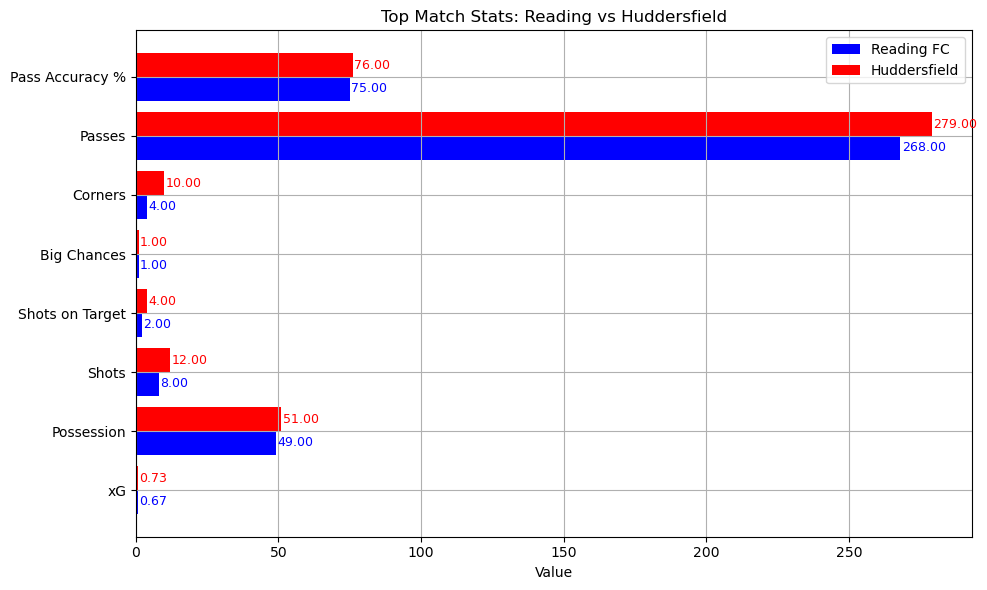

In [30]:
top_stats = {
    'xG': (match['rfc_xG_1st'] + match['rfc_xG_2nd'], match['opp_xG_1st'] + match['opp_xG_2nd']),
    'Possession': (match['rfc_Possesion'], match['opp_Possesion']),
    'Shots': (match['rfc_Shots'], match['opp_Shots']),
    'Shots on Target': (match['rfc_SOT'], match['opp_SOT']),
    'Big Chances': (match['rfc_BigChances'], match['opp_BigChances']),
    'Corners': (match['rfc_Corners'], match['opp_Corners']),
    'Passes': (match['rfc_Passes'], match['opp_Passes']),
    'Pass Accuracy %': (match['rfc_Pass%'], match['opp_Pass%'])
}

# Convert to DataFrame
basic_df = pd.DataFrame(top_stats, index=['Reading FC', 'Huddersfield']).T

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
y = range(len(basic_df))

# Reading FC bars
reading_bars = ax.barh(
    [i - bar_width / 2 for i in y],
    basic_df['Reading FC'],
    height=bar_width,
    label='Reading FC',
    color='blue'
)

# Huddersfield bars
huddersfield_bars = ax.barh(
    [i + bar_width / 2 for i in y],
    basic_df['Huddersfield'],
    height=bar_width,
    label='Huddersfield',
    color='red'
)

# Adding data labels
for bar in reading_bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y_pos, f'{width:.2f}', va='center', ha='left', color='blue', fontsize=9)

for bar in huddersfield_bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y_pos, f'{width:.2f}', va='center', ha='left', color='red', fontsize=9)

# Final formatting
ax.set_yticks(y)
ax.set_yticklabels(basic_df.index)
ax.set_xlabel("Value")
ax.set_title("Top Match Stats: Reading vs Huddersfield")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Reading FC Attack Analysis

- Looking at Attacking stats
- Attacking efficiency
- 1st Half vs 2nd Half Comparisons
- Match Momentum into Attacking areas
- Main Attacking Performance vs Huddersfield

Attacking metrics:

- xG = Expected Goals to have been scored
- Shots
- Shots on Target
- Big Chances
- Touches in the Opponents Box
- Crosses
- xA = Expected Assists

In [51]:
# Get relevant match data
goals = match['rfc_Score']
shots = match['rfc_Shots']
xg = match['rfc_xG_1st'] + match['rfc_xG_2nd']
big_chances = match['rfc_BigChances']
sot = match['rfc_SOT']
touches_in_box = match['rfc_Touches_In_Opp_Box_1st'] + match['rfc_Touches_In_Opp_Box_2nd']

# Opponent GK metrics
xgot = match['opp_xGOT_Faced_1st'] + match['opp_xGOT_Faced_2nd']
gk_prevented = match['opp_GK_Goals_Prevented_1st'] + match['opp_GK_Goals_Prevented_2nd']

# Final third penetration
total_passes = match['rfc_Passes']
final_third_passes = match['rfc_Passes_In_Final_Third']
final_third_penetration = final_third_passes / total_passes if total_passes else 0

# Shot location ratio
inside_box_shots = match['rfc_Shots_Inside_Box']
inside_box_ratio = inside_box_shots / shots if shots else 0
outside_box_shots = match['rfc_Shots_Outside_Box']
outside_box_ratio = outside_box_shots / shots if shots else 0

# Build efficiency dictionary
efficiency = {
    "Shot Conversion Rate": goals / shots if shots else 0,
    "xG per Shot": xg / shots if shots else 0,
    "Shot Accuracy": sot / shots if shots else 0,
    "Big Chance Conversion": goals / big_chances if big_chances else 0,
    "Shots per Touch in Box": shots / touches_in_box if touches_in_box else 0,
    "xG Delta (Over/Under Performance)": goals - xg,
    "xGOT (Faced by Opponent GK)": xgot,
    "Opponent GK Goals Prevented": gk_prevented,
    "Final Third Penetration": final_third_penetration,
    "Shots Inside Box %": inside_box_ratio,
    "Shots Outside Box %": outside_box_ratio
}

# Convert to Series and print
eff_df = pd.Series(efficiency).round(3)
print("🔍 Reading FC Attacking Efficiency Metrics:")
print(eff_df)


🔍 Reading FC Attacking Efficiency Metrics:
Shot Conversion Rate                 0.000
xG per Shot                          0.084
Shot Accuracy                        0.250
Big Chance Conversion                0.000
Shots per Touch in Box               0.500
xG Delta (Over/Under Performance)   -0.670
xGOT (Faced by Opponent GK)          0.410
Opponent GK Goals Prevented          0.410
Final Third Penetration              0.287
Shots Inside Box %                   0.625
Shots Outside Box %                  0.375
dtype: float64


# 1st Half vs 2nd Half 

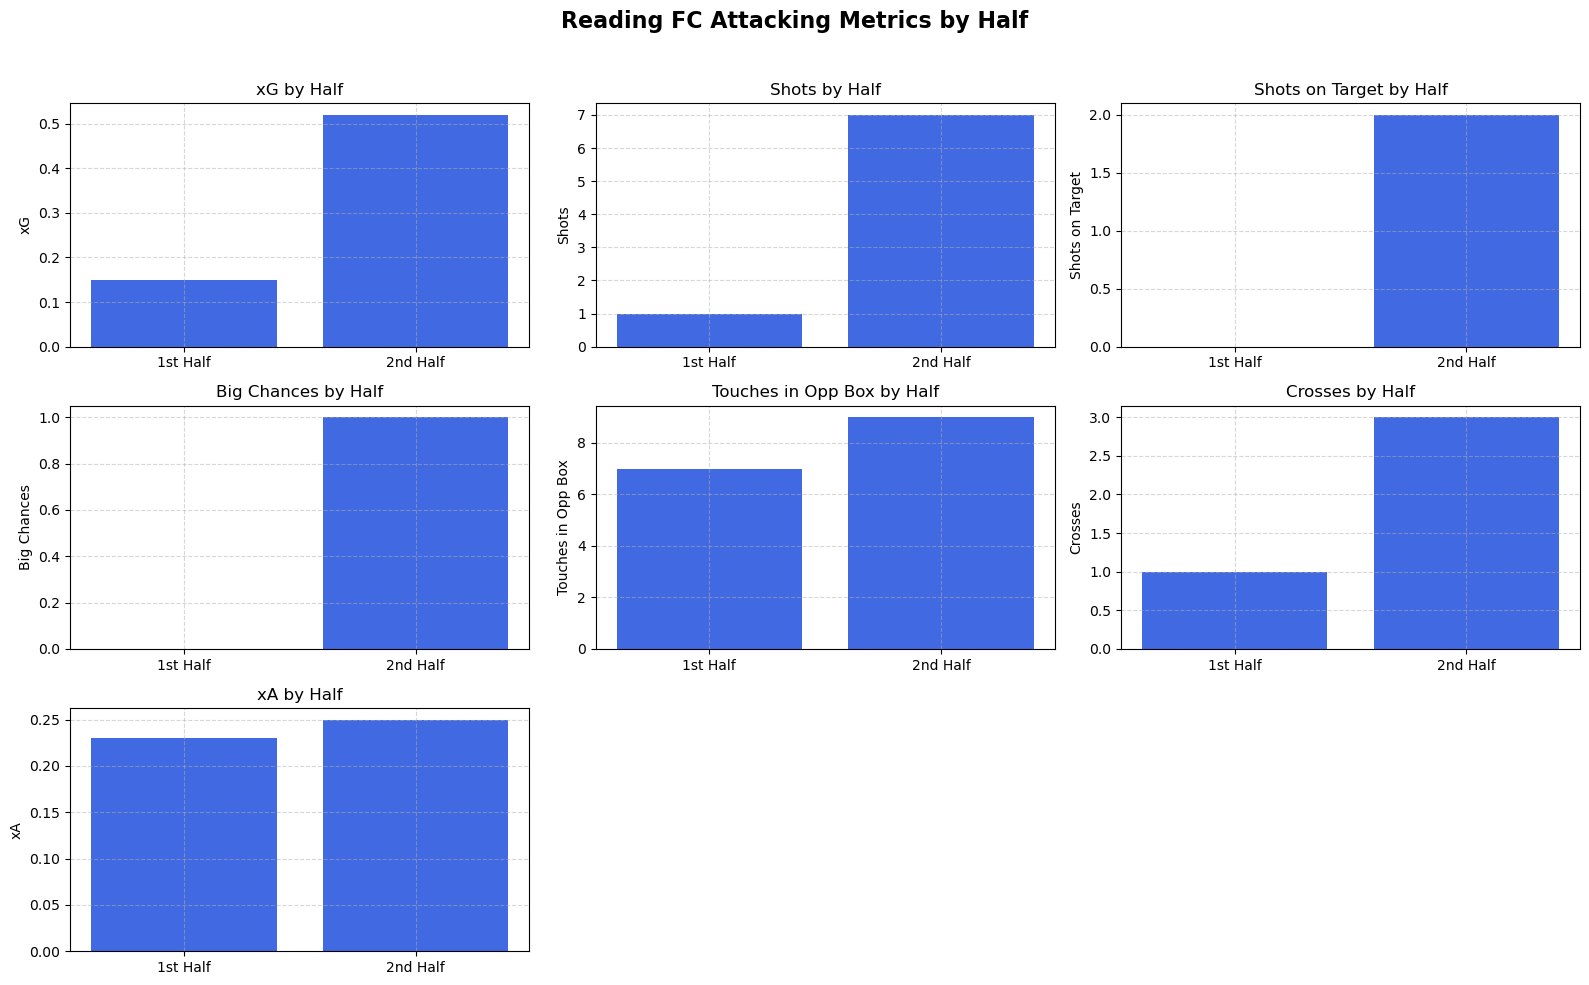

In [32]:
attacking_metrics = {
    "xG": [match['rfc_xG_1st'], match['rfc_xG_2nd']],
    "Shots": [match['rfc_Shots_1st'], match['rfc_Shots_2nd']],
    "Shots on Target": [match['rfc_SOT_1st'], match['rfc_SOT_2nd']],
    "Big Chances": [match['rfc_BigChances_1st'], match['rfc_BigChances_2nd']],
    "Touches in Opp Box": [match['rfc_Touches_In_Opp_Box_1st'], match['rfc_Touches_In_Opp_Box_2nd']],
    "Crosses": [match['rfc_Crosses_1st'], match['rfc_Crosses_2nd']],
    "xA": [match['rfc_xA_1st'], match['rfc_xA_2nd']],
}

# Plotting setup:
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(attacking_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(attacking_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Attacking Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\arbry\AppData\Local\Temp\ipykernel_49692\4149019737.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\arbry\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


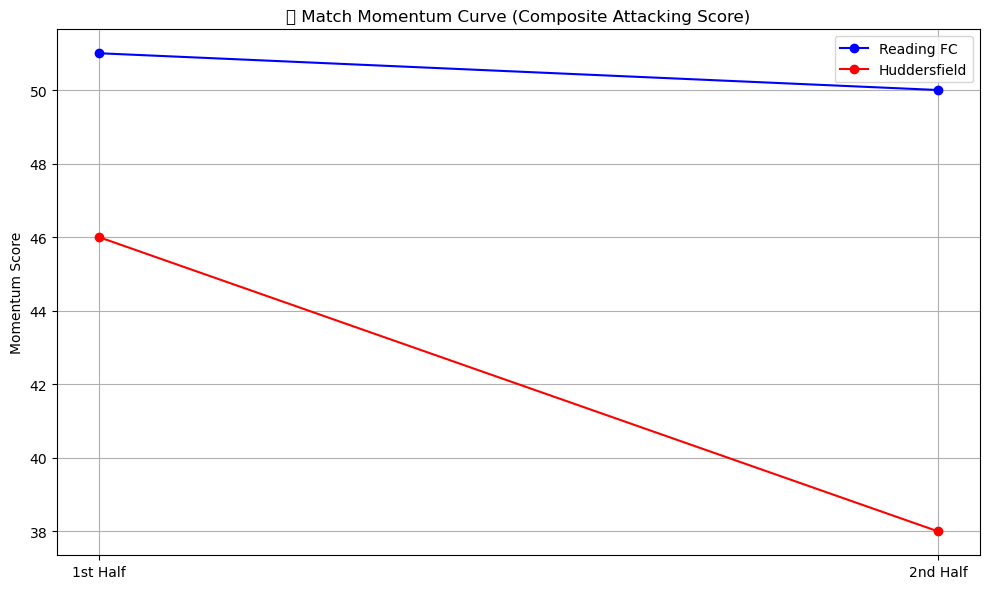

In [33]:
# Reading attacking intent per half (normalized)
rfc_attack_1st = (
    match['rfc_Shots_1st'] +
    match['rfc_Touches_In_Opp_Box_1st'] +
    match['rfc_Passes_In_Final_Third_1st']
)
rfc_attack_2nd = (
    match['rfc_Shots_2nd'] +
    match['rfc_Touches_In_Opp_Box_2nd'] +
    match['rfc_Passes_In_Final_Third_2nd']
)

opp_attack_1st = (
    match['opp_Shots_1st'] +
    match['opp_Touches_In_Opp_Box_1st'] +
    match['opp_Passes_In_Final_Third_1st']
)
opp_attack_2nd = (
    match['opp_Shots_2nd'] +
    match['opp_Touches_In_Opp_Box_2nd'] +
    match['opp_Passes_In_Finals_Third_2nd']
)

# Momentum score
rfc_momentum = [rfc_attack_1st, rfc_attack_2nd]
opp_momentum = [opp_attack_1st, opp_attack_2nd]

# Plot
plt.figure(figsize=(10, 6))
plt.plot([0, 1], rfc_momentum, label='Reading FC', color='blue', marker='o')
plt.plot([0, 1], opp_momentum, label='Huddersfield', color='red', marker='o')

plt.xticks([0, 1], ['1st Half', '2nd Half'])
plt.title("📊 Match Momentum Curve (Composite Attacking Score)")
plt.ylabel("Momentum Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
touches_per_f3_pass = match['rfc_Touches_In_Opp_Box'] / match['rfc_Passes_In_Final_Third'] if match['rfc_Passes_In_Final_Third'] else 0
print(f"Final Third Penetration & Threat by Reading FC: {touches_per_f3_pass:.2f}")

Final Third Penetration & Threat by Reading FC: 0.21


# Match Attacking Performance Radar

In [35]:
import plotly.graph_objects as go

# Define attacking categories
attack_categories = ['xG', 'Shots', 'Shots on Target', 'Big Chances', 'xA', 'Touches in Opp Box']

# Raw values
reading_attack_vals = [
    match['rfc_xG_1st'] + match['rfc_xG_2nd'],
    match['rfc_Shots'],
    match['rfc_SOT'],
    match['rfc_BigChances'],
    match['rfc_xA_1st'] + match['rfc_xA_2nd'],
    match['rfc_Touches_In_Opp_Box_1st'] + match['rfc_Touches_In_Opp_Box_2nd'],
]

opp_attack_vals = [
    match['opp_xG_1st'] + match['opp_xG_2nd'],
    match['opp_Shots'],
    match['opp_SOT'],
    match['opp_BigChances'],
    match['opp_xA_1st'] + match['opp_xA_2nd'],
    match['opp_Touches_In_Opp_Box_1st'] + match['opp_Touches_In_Opp_Box_2nd'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_attack_vals, opp_attack_vals)]
reading_norm = [r / m for r, m in zip(reading_attack_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_attack_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=attack_categories + [attack_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=attack_categories + [attack_categories[0]],
    fill='toself',
    name='Huddersfield',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Attacking Performance Radar: Reading FC vs Huddersfield",
    showlegend=True
)

fig.show()


# Reading FC Game Control Analysis

- Looking at 1st Half vs 2nd Half comparison for match control
- Match momentum and Dominance
- Overall Game Control Performance

Game control metrics include:

- Possession
- Passes and Accuracy
- Long Passes and Accuracy
- Passes in Final Third and Accuracy

# 1st Half vs 2nd Half 

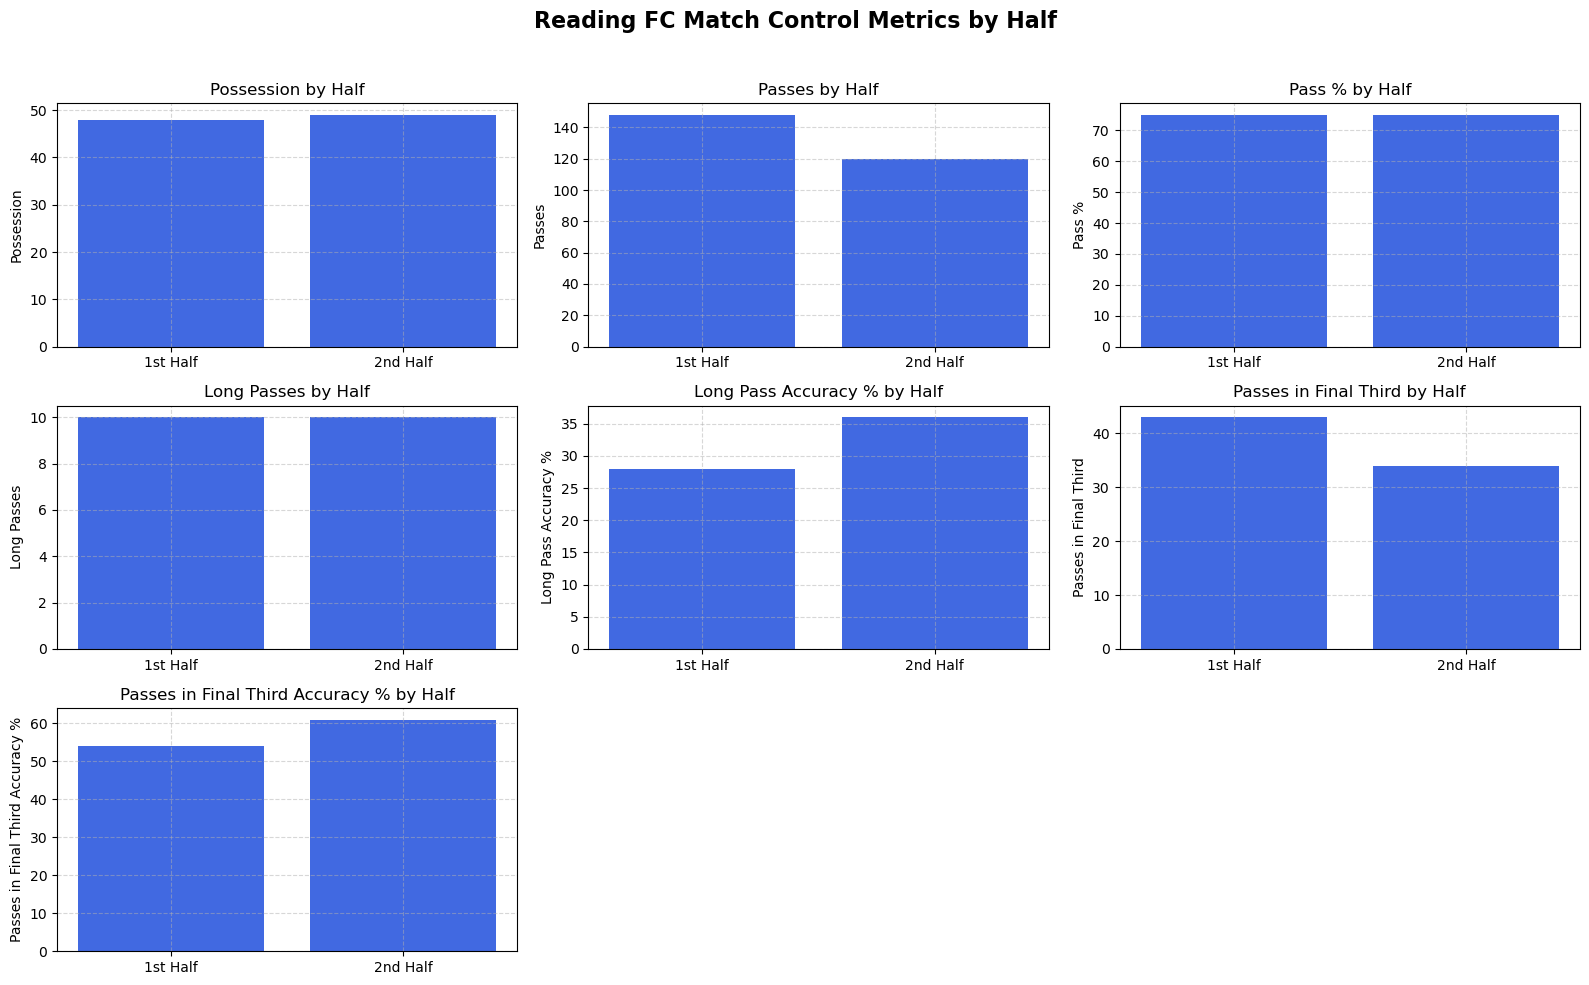

In [36]:
control_metrics = {
    "Possession": [match['rfc_Possession_1st'], match['rfc_Possession_2nd']],
    "Passes": [match['rfc_Passes_1st'], match['rfc_Passes_2nd']],
    "Pass %": [match['rfc_Pass%_1st'], match['rfc_Pass%_2nd']],
    "Long Passes": [match['rfc_Long_Passes_1st'], match['rfc_Long_Passes_2nd']],
    "Long Pass Accuracy %": [match['rfc_LongPass%_1st'], match['rfc_LongPass%_2nd']],
    "Passes in Final Third": [match['rfc_Passes_In_Final_Third_1st'], match['rfc_Passes_In_Final_Third_2nd']],
    "Passes in Final Third Accuracy %": [match['rfc_Pass_In_Final_Third%_1st'], match['rfc_Pass_In_Final_Third%_2nd']]
}

# Plotting setup:
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(control_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(control_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Match Control Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [37]:
verticality = match['rfc_LongPass%'] / match['rfc_Pass%'] if match['rfc_Pass%'] else 0
print("Verticality Ratio (Long Pass% / Pass%):", round(verticality, 3))


Verticality Ratio (Long Pass% / Pass%): 0.413


C:\Users\arbry\AppData\Local\Temp\ipykernel_49692\2949280788.py:22: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

c:\Users\arbry\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



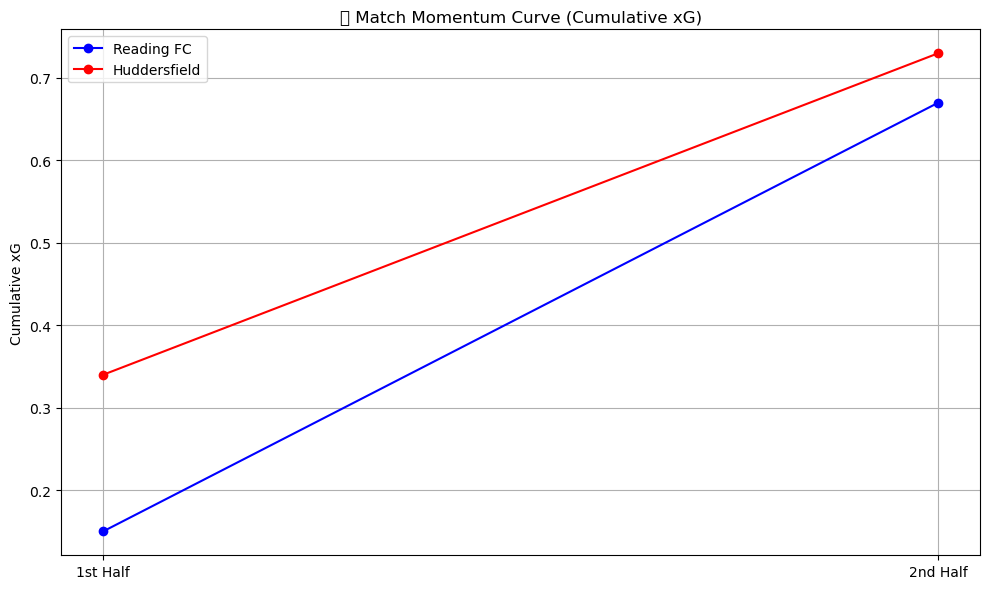

In [38]:
import matplotlib.pyplot as plt

# Get xG by half
rfc_xg = [match['rfc_xG_1st'], match['rfc_xG_2nd']]
opp_xg = [match['opp_xG_1st'], match['opp_xG_2nd']]

# Cumulative xG over halves
rfc_cumulative = [rfc_xg[0], rfc_xg[0] + rfc_xg[1]]
opp_cumulative = [opp_xg[0], opp_xg[0] + opp_xg[1]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([0, 1], rfc_cumulative, label='Reading FC', color='blue', marker='o')
plt.plot([0, 1], opp_cumulative, label='Huddersfield', color='red', marker='o')

# Styling
plt.xticks([0, 1], ['1st Half', '2nd Half'])
plt.title("📈 Match Momentum Curve (Cumulative xG)")
plt.ylabel("Cumulative xG")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
# Custom "dominance" index (normalize components first)
def normalize(val, max_val): return val / max_val if max_val else 0

dominance_index = (
    0.4 * normalize(xg, xg + match['opp_xG_1st'] + match['opp_xG_2nd']) +
    0.2 * normalize(match['rfc_Possesion'], 100) +
    0.2 * normalize(match['rfc_SOT'], match['rfc_SOT'] + match['opp_SOT']) +
    0.2 * normalize(match['rfc_Passes'], match['rfc_Passes'] + match['opp_Passes'])
)

print(f"Match Dominance Index (0 to 1): {dominance_index:.2f}")

Match Dominance Index (0 to 1): 0.45


In [40]:
ppda = match['opp_Passes'] / match['rfc_Tackles'] if match['rfc_Tackles'] else 0
print(f"Team Pressing by Reading FC: {ppda:.2f}")

Team Pressing by Reading FC: 46.50


# Match Game Control Performance Radar

In [41]:
# Define game control categories
control_categories = ['Possession', 'Passes', 'Long Passes', 'Long Pass Accuracy', 'Passes in Final Third', 'Passes in Final Third Accuracy']

# Raw values
reading_control_vals = [
    match['rfc_Possesion'],
    match['rfc_Passes'],
    match['rfc_Long_Passes'],
    match['rfc_LongPass%'],
    match['rfc_Passes_In_Final_Third'],
    match['rfc_Pass_In_Final_Third%'],
]

opp_control_vals = [
    match['opp_Possesion'],
    match['opp_Passes'],
    match['opp_Long_Passes'],
    match['opp_LongPass%'],
    match['opp_Passes_In_Final_Third'],
    match['opp_Pass_In_Final_Third%'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_control_vals, opp_control_vals)]
reading_norm = [r / m for r, m in zip(reading_control_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_control_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=control_categories + [control_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=control_categories + [control_categories[0]],
    fill='toself',
    name='Huddersfield',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Game Control Performance Radar: Reading FC vs Huddersfield",
    showlegend=True
)

fig.show()

# Defensive Stats Analysis

- Looking at 1st Half vs 2nd Half comparison for the defensive metrics
- Defensive occurance
- Overall Defensive Performance

Defensive metrics include:

- Fouls
- Tackles and Accuracy
- Duels Won
- Clearances
- Interceptions


# 1st Half vs 2nd Half 

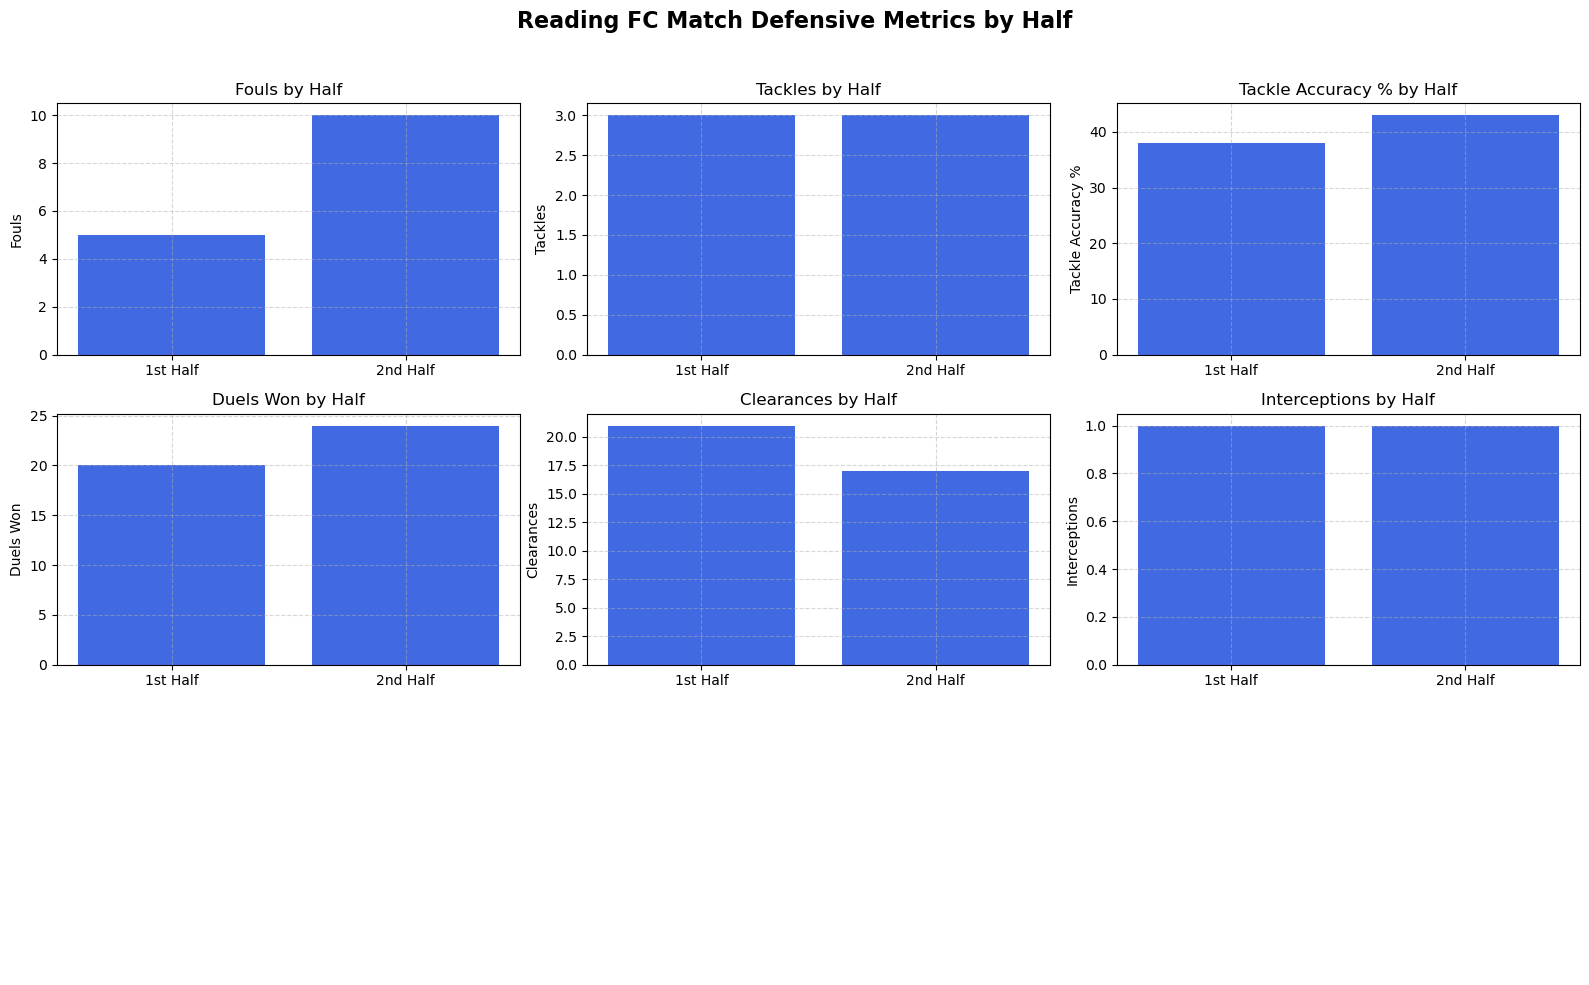

In [42]:
defensive_metrics = {
    "Fouls": [match['rfc_Fouls_1st'], match['rfc_Fouls_2nd']],
    "Tackles": [match['rfc_Tackles_1st'], match['rfc_Tackles_2nd']],
    "Tackle Accuracy %": [match['rfc_Tackle%_1st'], match['rfc_Tackle%_2nd']],
    "Duels Won": [match['rfc_Duels_Won_1st'], match['rfc_Duels_Won_2nd']],
    "Clearances": [match['rfc_Clearances_1st'], match['rfc_Clearances_2nd']],
    "Interceptions": [match['rfc_Interceptions_1st'], match['rfc_Interceptions_2nd']]
}

# Plotting setup: 
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(defensive_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(defensive_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Match Defensive Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [43]:
tackle_eff = match['rfc_Tackles'] * (match['rfc_Tackle%'] / 100)
print(f"Tackles Won by Reading FC: {tackle_eff:.2f}")


Tackles Won by Reading FC: 2.40


In [44]:
defensive_actions_reading = match['rfc_Tackles'] + match['rfc_Clearances'] + match['rfc_Interceptions']
defensive_actions_lincoln = match['opp_Tackles'] + match['opp_Clearances'] + match['opp_Interceptions']

print(f"Total Defensive Actions by Reading FC: {defensive_actions_reading}")
print(f"Total Defensive Actions by Huddersfield: {defensive_actions_lincoln}")

Total Defensive Actions by Reading FC: 46
Total Defensive Actions by Huddersfield: 42


In [45]:
touches_per_f3_pass = match['opp_Touches_In_Opp_Box'] / match['opp_Passes_In_Final_Third'] if match['opp_Passes_In_Final_Third'] else 0
print(f"Final Third Penetration & Threat by Huddersfield: {touches_per_f3_pass:.2f}")

Final Third Penetration & Threat by Huddersfield: 0.29


# Match Defensive Performance Radar

In [46]:
# Define game control categories
defensive_categories = ['Fouls', 'Tackles', 'Tackle Accuracy', 'Duels Won', 'Clearances', 'Interceptions']

# Raw values
reading_defensive_vals = [
    match['rfc_Fouls'],
    match['rfc_Tackles'],
    match['rfc_Tackle%'],
    match['rfc_Duels_Won'],
    match['rfc_Clearances'],
    match['rfc_Interceptions'],
]

opp_defensive_vals = [
    match['opp_Fouls'],
    match['opp_Tackles'],
    match['opp_Tackle%'],
    match['opp_Duels_Won'],
    match['opp_Clearances'],
    match['opp_Interceptions'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_defensive_vals, opp_defensive_vals)]
reading_norm = [r / m for r, m in zip(reading_defensive_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_defensive_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=defensive_categories + [defensive_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=defensive_categories + [defensive_categories[0]],
    fill='toself',
    name='Huddersfield',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Defensive Performance Radar: Reading FC vs Huddersfield",
    showlegend=True
)

fig.show()

# Goalkeeper Analysis

- Looking at 1st Half vs 2nd Half Goalkeeper metrics
- Goalkeeping efficiency
- Overall Goalkeeper Performance

Goalkeeper metrics include:

- Saves
- xGOT Faced = Expected Goals on Target
- Goals Prevented

# 1st Half vs 2nd Half

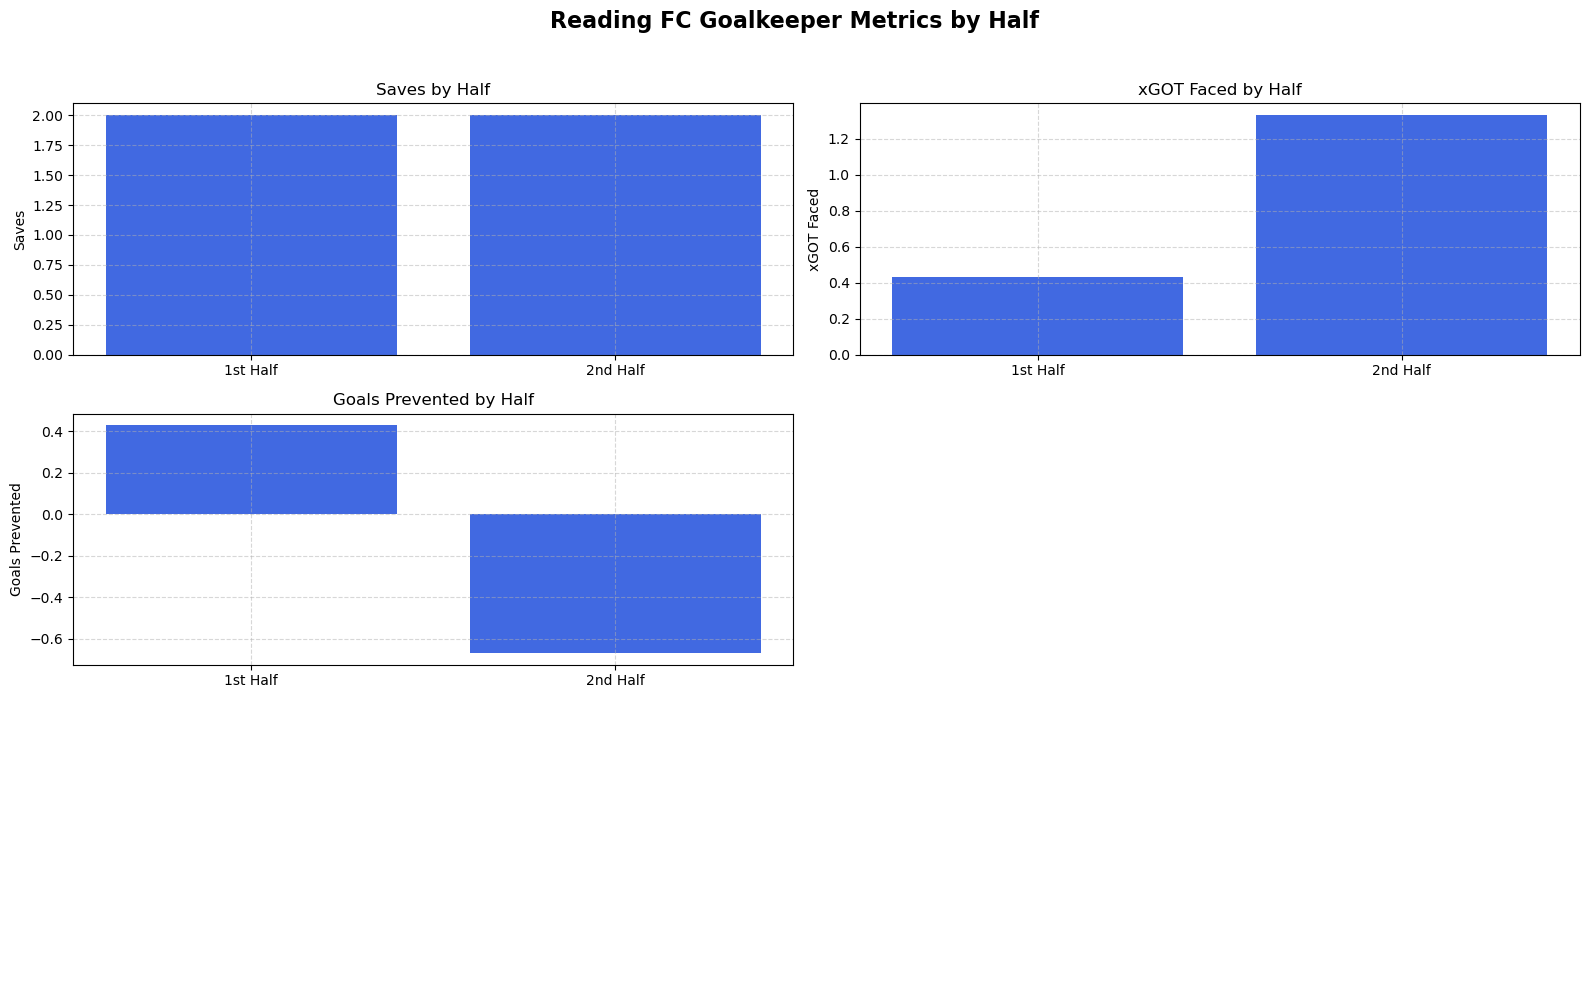

In [47]:
goalkeeper_metrics = {
    "Saves": [match['rfc_GK_Saves_1st'], match['rfc_GK_Saves_2nd']],
    "xGOT Faced": [match['rfc_xGOT_Faced_1st'], match['rfc_xGOT_Faced_2nd']],
    "Goals Prevented": [match['rfc_GK_Goals_Prevented_1st'], match['rfc_GK_Goals_Prevented_2nd']]
}

# Plotting setup: 
fig, axs = plt.subplots(3, 2, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(goalkeeper_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(goalkeeper_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Goalkeeper Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [48]:
# Shot-stopping performance
xGOT_faced = match['rfc_xGOT_Faced']
saves = match['rfc_GK_Saves']
goals = match['opp_Score']

gk_performance = {
    "xGOT Faced": xGOT_faced,
    "Saves Made": saves,
    "Goals Conceded": goals,
    "Goals Prevented": match['rfc_GK_Goals_Prevented'],
    "Save Rate vs xGOT": (saves - xGOT_faced) if xGOT_faced else 0
}

print(pd.Series(gk_performance))


xGOT Faced           1.76
Saves Made           4.00
Goals Conceded       2.00
Goals Prevented     -0.24
Save Rate vs xGOT    2.24
dtype: float64


In [49]:
save_eff = match['rfc_GK_Saves'] / match['opp_SOT'] if match['opp_SOT'] else 0
print(f"Save Efficiency by Reading FC: {save_eff:.2f}")

Save Efficiency by Reading FC: 1.00


In [50]:
# Define Goalkeeper categories
goalkeeper_categories = ['Saves', 'xGOT', 'Goals Prevented']

# Raw values
reading_goalkeeper_vals = [
    match['rfc_GK_Saves'],
    match['rfc_xGOT_Faced'],
    match['rfc_GK_Goals_Prevented']
]

opp_goalkeeper_vals = [
    match['opp_GK_Saves'],
    match['opp_xGOT_Faced'],
    match['opp_GK_Goals_Prevented']
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_goalkeeper_vals, opp_goalkeeper_vals)]
reading_norm = [r / m for r, m in zip(reading_goalkeeper_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_goalkeeper_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=goalkeeper_categories + [goalkeeper_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=goalkeeper_categories + [goalkeeper_categories[0]],
    fill='toself',
    name='Huddersfield',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Goalkeeper Performance Radar: Reading FC vs Huddersfield",
    showlegend=True
)

fig.show()